<h1 style="text-align:center;font-size:200%;;">Customer Churn Project</h1>


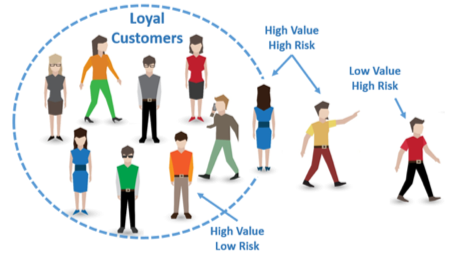

<a class= "anchor" id="0.1"></a>
# Table of contents

1. [Introduction](#1)
2. [Data dictionary](#2)
3. [Importing Libraries & Data](#3)
4. [Understanding Data](#4)
5. [Scrutiny of Variables](#5)
6. [Play with Data](#6)
    * [Feature Engenering](#6.1)
    * [Gathering all columns](#6.2)
7. [Exploratary Data Analysis](#7)
    * [Question & Answer](#7.1)
    * [What is the most prefered login device by customers ?](#7.2)
    * [Which is the prefered payment mode for customer?](#7.3)
    * [ What is the distance between warehouse to customer house in different city tier ?](#7.4)
    * [Which commodity are order most of the time?](#7.5)
    * [What is the average cashback on per order?](#7.6)
    * [Find out average customer churn rate ?](#7.7)
    * [ How many Average hours does customer visited on app?](#7.8)
8. [Missing Value Treatment](#8)
    * [Finding missing value in data](#8.1)
    * [Treatment of missing value](#8.2)
9. [Outlier Treatment](#9)
    * [Percentile method](#9.1)
    * [Capping of outliers](#9.2)
10. [Dummy Creation](#10)
11. [Model Development](#11)
    * [Data spliting into X and Y](#11.1)
    * [Data Balancing with smote](#11.2)
    * [Logistic Regression](#11.3)
    * [Accuracy](#11.4)
12. [Summary](#12)

## Introduction<a class= "anchor" id="1"></a>

[Table of content](#0.1)

**Customer churn is one of the most important metrics for a growing business to evaluate. While it's not the happiest measure, it's a number that can give your company the hard truth about its customer retention.
It's hard to measure success if you don't measure the inevitable failures, too. While you strive for 100% of customers to stick with your company, that's simply unrealistic. That's where customer churn comes in.**


Customer churn or customer attrition is the phenomenon where customers of a business no longer purchase or interact with the business. A high churn means that a higher number of customers no longer want to purchase goods and services from the business. Customer churn rate or customer attrition rate is the mathematical calculation of the percentage of customers who are not likely to make another purchase from a business.

Customer churn happens when customers decide to not continue purchasing products/services from an organization and end their association. It is an integral parameter for the organization since acquiring a new customer could cost almost 7 times more than retaining an existing customer. Customer churn can prove to be a roadblock for an exponentially growing organization and a retention strategy should be decided in order to avoid an increase in customer churn rates.  

**Advantages of Customer Churn Prevention**

* **Gain information for improvement**:  Dissatisfied customers are a source of constructive feedback for an organization’s      betterment. An organization will gain information about aspects that need to be improved while implementing strategies to   prevent customer churn.



* **Reduce the risk of business**:  Customer churn indicates a direct loss to the business. Selling a new product/service to an existing customer will be much easier than selling it to a new customer. Thus, customer churn can be harmful to the growth of the business.



* **Understand the target market**:   Constantly working towards the reduction of customer churn will uncover layers of the market which were otherwise unknown. Surveys focus groups and other such activities can be carried out to know the target market in a better manner and in turn reduce customer churn.



* **Build a competitive advantage in the market**:   In a world where there is constant competition to attain new customers and retain existing ones, having an edge over the competition is important. In the process of reducing customer churn, not only do customers know unknown aspects of a business but also build a competitive advantage over the others in the market.



In the simplest form, the customer churn rate is the number of customers you have lost divided by the total number of       customers.  To have an estimate you can segment your customers on the basis of the frequency of their purchase.

Customer Churn Rate = No. of Customers lost/Total no. of customers (Period) x 100



## Data dictionary <a class= "anchor" id="2"></a>

[Table of content](#0.1)


**CustomerID**  :	Unique customer ID

**Churn** 	    :    Churn Flag

**Tenure**	    :Tenure of customer in organization

**PreferredLoginDevice**  :	Preferred login device of customer

**CityTier**    : 	City tier

**WarehouseToHome**   :	Distance in between warehouse to home of customer

**PreferredPaymentMode**     : 	Preferred payment method of customer

**Gender** :	Gender of customer

**HourSpendOnApp**	: Number of hours spend on mobile application or website

**NumberOfDeviceRegistered**: 	Total number of deceives is registered on particular customer

**PreferedOrderCat** : 	Preferred order category of customer in last month

**SatisfactionScore** : 	Satisfactory score of customer on service

**MaritalStatus** : 	Marital status of customer

**NumberOfAddress** :	Total number of added added on particular customer

**Complain** :	Any complaint has been raised in last month

**OrderAmountHikeFromlastYear** :	Percentage increases in order from last year

**CouponUsed** :	Total number of coupon has been used in last month

**OrderCount** :	Total number of orders has been places in last month

**DaySinceLastOrder** :	Day Since last order by customer

**CashbackAmount** :	Average cashback in last month
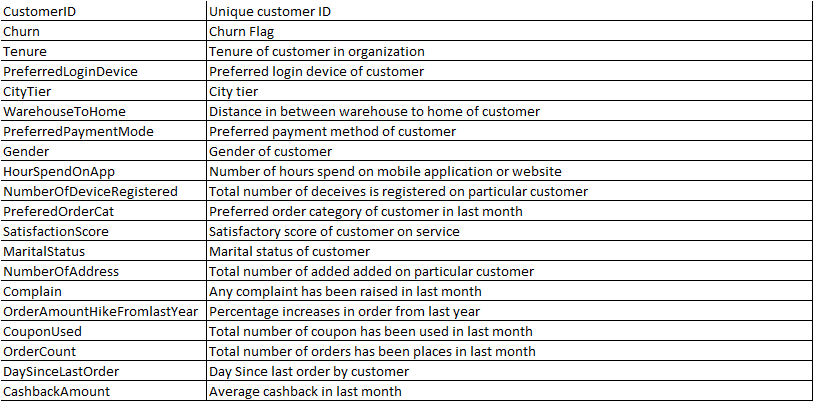

## Importing Libraries <a class= "anchor" id="3"></a>

[Table of content](#0.1)

In [63]:
import os
import pandas as pd 
import numpy as np
# pd.set_option('display.max_columns',None)  # to see all columns
import matplotlib.pyplot as plt
import seaborn as sns
import openpyxl
import warnings
warnings.filterwarnings("ignore")

In [2]:
os.chdir("E:\data")

In [4]:
churn=pd.read_excel("E Commerce Dataset.xlsx",sheet_name="E Comm")

## Understanding Data<a class= "anchor" id="4"></a>

[Table of content](#0.1)

In [5]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5630 entries, 0 to 5629
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CustomerID                   5630 non-null   int64  
 1   Churn                        5630 non-null   int64  
 2   Tenure                       5366 non-null   float64
 3   PreferredLoginDevice         5630 non-null   object 
 4   CityTier                     5630 non-null   int64  
 5   WarehouseToHome              5379 non-null   float64
 6   PreferredPaymentMode         5630 non-null   object 
 7   Gender                       5630 non-null   object 
 8   HourSpendOnApp               5375 non-null   float64
 9   NumberOfDeviceRegistered     5630 non-null   int64  
 10  PreferedOrderCat             5630 non-null   object 
 11  SatisfactionScore            5630 non-null   int64  
 12  MaritalStatus                5630 non-null   object 
 13  NumberOfAddress   

Above cell is telling the basic information about data like null values , object columns , non object columns range of data etc.  

In [6]:
churn.shape

(5630, 20)

we have good amount of data. where over 5000 of records Which divided into  20 columns 

In [7]:
churn.dtypes[churn.dtypes=="object"].count()

5

In [8]:
churn.dtypes[churn.dtypes!="object"].count()

15

we have 5 object columns and 15 non object base columns.

In [9]:
churn.duplicated().sum()

0

As we saw that their is no value which is overlaping in dataset 

In [10]:
churn.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
CustomerID,5630.0,52815.500000,1625.385339,50001.0,51408.25,52815.50,54222.7500,55630.00
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.00,0.0000,1.00
Tenure,5366.0,10.189899,8.557241,0.0,2.00,9.00,16.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.00,3.0000,3.00
WarehouseToHome,5379.0,15.639896,8.531475,5.0,9.00,14.00,20.0000,127.00
HourSpendOnApp,5375.0,2.931535,0.721926,0.0,2.00,3.00,3.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,3.00,4.00,4.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,2.00,3.00,4.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,2.00,3.00,6.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.00,1.0000,1.00


Above cell will tell the breif about dataset & variable it will show mean , min , median , max ,null-value count etc, of a
particular variable With the help of above column we can also found the Inter Quartile Range(IQR) by Subtracting 
75%(q3) - 25%(q1) by IQR we also found outliers in our dataset. 

As we observed our Data we found that data is very important in terms finding churn prediction. This data will give insights of consumer behaviour we will see it in further steps .By observing all insight of data we will going to make the policies which are good for the company we fullfil all possible loopholes. We also found  that consumer id variable is not  signifiatnt for our research so, we are going to drop that variable , Also our target variable is Churn variable .

In [11]:
churn.drop("CustomerID",axis = 1 ,inplace = True) # droping the customerID variable as it is no significance in our research. 

========================================================================================================================

We created a function which will extract object columns from data and give insight of that particular columns like sub categories , count of particular subcategory , data type etc. By this we will know that our focusing Area.

## Scrutiny of Variables<a class= "anchor" id="5"></a>


[Table of content](#0.1)

In [12]:
for i in churn.columns:
    if churn[i].dtypes == 'object':
        print(i)
        print("=====================")
        print('the values are:') 
        print(churn[i].value_counts())
        print()
        print("********************************")

PreferredLoginDevice
the values are:
Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

********************************
PreferredPaymentMode
the values are:
Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

********************************
Gender
the values are:
Male      3384
Female    2246
Name: Gender, dtype: int64

********************************
PreferedOrderCat
the values are:
Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

********************************
MaritalStatus
the values are:
Married     2986
Single      1796
Divorced     848
Name: MaritalStatus, dtype: int64

********************************


Above columns giving details about variables and their sub category these variable plays an critical roll in research because these variables tell the factor of customer as well as factor of placing order etc. 

========================================================================================================================

We created a function which will extract Non object columns from data and give insight of that particular columns like sub categories ,count of particular subcategory ,data type etc. By this we will know that our focusing Area.

In [13]:
for i in churn.columns:
    if churn[i].dtypes != 'object':
        print(i)
        print("=====================")
        print('the values are:') 
        print(churn[i].value_counts())
        print()
        print("********************************")

Churn
the values are:
0    4682
1     948
Name: Churn, dtype: int64

********************************
Tenure
the values are:
1.0     690
0.0     508
8.0     263
9.0     247
7.0     221
10.0    213
5.0     204
4.0     203
3.0     195
11.0    194
6.0     183
12.0    182
13.0    181
14.0    176
2.0     167
15.0    159
16.0    149
19.0    140
18.0    123
20.0    109
17.0    106
23.0     89
21.0     84
22.0     76
24.0     75
28.0     70
30.0     66
27.0     66
26.0     60
25.0     59
29.0     55
31.0     49
50.0      1
60.0      1
51.0      1
61.0      1
Name: Tenure, dtype: int64

********************************
CityTier
the values are:
1    3666
3    1722
2     242
Name: CityTier, dtype: int64

********************************
WarehouseToHome
the values are:
9.0      559
8.0      444
7.0      389
16.0     322
14.0     299
6.0      295
15.0     288
10.0     274
13.0     249
11.0     233
12.0     221
17.0     217
22.0     104
31.0     101
23.0      96
30.0      94
32.0      94
35.0      9

Above columns giving details about variable and their sub category these variable plays an critical roll in research because these variables tell the factor of the product related like distance B/W warehouse to home,ratings of product ,durability, spending of time on site or apps etc.

# Play with Data (EDA)<a class= "anchor" id="6"></a>

[Table of content](#0.1)

## Feature Engenering<a class= "anchor" id="6.1"></a>

[Table of content](#0.1)

As we observed in scrutiny of variable section data  value is good but in some case values are same but, sub category name were  different. Hence we are going to disolve those variables and there values will be transfer into original columns by doing this our value count will be accurate also it will help in model development by reduceing the readabilty of the model. 

In [14]:
churn["PreferredLoginDevice"].value_counts()

Mobile Phone    2765
Computer        1634
Phone           1231
Name: PreferredLoginDevice, dtype: int64

* As mobile phone and phone both are same so, we have merged them.

In [15]:
churn.loc[churn["PreferredLoginDevice"]=="Phone" , "PreferredLoginDevice"]= "Mobile Phone"

In [16]:
churn["PreferredLoginDevice"].value_counts()

Mobile Phone    3996
Computer        1634
Name: PreferredLoginDevice, dtype: int64

* Items were merged values were changed.

In [17]:
churn['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1501
E wallet             614
UPI                  414
COD                  365
CC                   273
Cash on Delivery     149
Name: PreferredPaymentMode, dtype: int64

COD is Cash on Delivery and CC is Credit Card, Therefore We are going to merge both variables . 

In [18]:
churn.loc[churn['PreferredPaymentMode']== "COD" , "PreferredPaymentMode"]="Cash on Delivery"
churn.loc[churn['PreferredPaymentMode']== "CC" , "PreferredPaymentMode"]="Credit Card"

In [19]:
churn['PreferredPaymentMode'].value_counts()

Debit Card          2314
Credit Card         1774
E wallet             614
Cash on Delivery     514
UPI                  414
Name: PreferredPaymentMode, dtype: int64

* Items were merged values were changed.

Mobile similar to mobile Phone so, we are going to merge them into one column

In [20]:
churn["PreferedOrderCat"].value_counts()

Laptop & Accessory    2050
Mobile Phone          1271
Fashion                826
Mobile                 809
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

In [21]:
churn.loc[churn["PreferedOrderCat"]=="Mobile","PreferedOrderCat"]="Mobile Phone"

In [22]:
churn["PreferedOrderCat"].value_counts()

Mobile Phone          2080
Laptop & Accessory    2050
Fashion                826
Grocery                410
Others                 264
Name: PreferedOrderCat, dtype: int64

* Items were merged values were changed.

In [23]:
# Target Variable
churn["Churn"].value_counts()

0    4682
1     948
Name: Churn, dtype: int64

* As we observed 0 label it contain 4682 value and for 1 label it contain 948 value , which is the case of Imbalance 

# Gathering all columns<a class= "anchor" id="6.2"></a>


[Table of content](#0.1)

**Gathering all numeric and categorical variable into specific column according to their significance**

In [24]:
churn.dtypes[churn.dtypes=="object"].index

Index(['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus'],
      dtype='object')

In [25]:
churn.dtypes[churn.dtypes!="object"].index

Index(['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount'],
      dtype='object')

In [26]:
cat_cols =['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender',
       'PreferedOrderCat', 'MaritalStatus']

num_cols =['Churn', 'Tenure', 'CityTier', 'WarehouseToHome', 'HourSpendOnApp',
       'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress',
       'Complain', 'OrderAmountHikeFromlastYear', 'CouponUsed', 'OrderCount',
       'DaySinceLastOrder', 'CashbackAmount']

Succesfully combined all categorical and numerical columns according to their significance , By doing this step the readabilty of model is faster also easy to identify variable. 

# Exploratary Data Analysis(EDA)<a class= "anchor" id="7"></a>

[Table of content](#0.1)

## Question & Answer<a class= "anchor" id="7.1"></a>



Q1.) What is the most prefered login device by customers ?<a class= "anchor" id="7.2"></a>

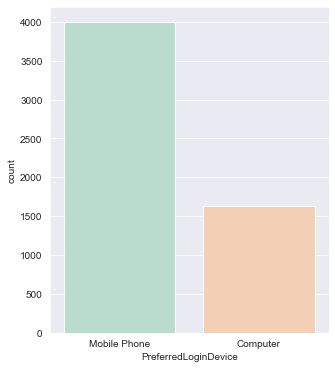

In [27]:
plt.figure(figsize = (5,6))
sns.set_style('darkgrid')
sns.countplot(x  = 'PreferredLoginDevice',  data = churn, palette = 'Pastel2');

**Answer**: Most of the customer use Mobile phone as login device

Q2.)Which is the prefered payment mode for customer?<a class= "anchor" id="7.3"></a>

In [64]:
df  =churn['PreferredPaymentMode'].value_counts().reset_index()
df.columns = ['mode', 'count']
df

import plotly.express as px
fig = px.treemap(df, path = ['mode'],
                 values = 'count', 
                 color_discrete_sequence=px.colors.qualitative.Antique)
fig.show()

**Answer**: Maximum number of transcation done by debit card and credit card and small portion of payment done by UPI

Q3.) What is the distance between warehouse to customer house in different city tier ?<a class= "anchor" id="7.4"></a>

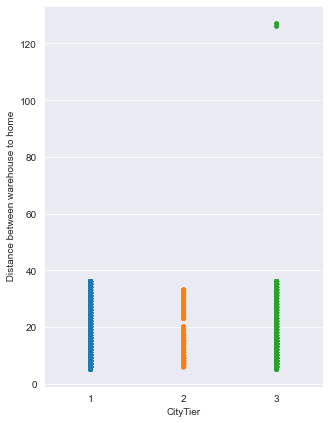

In [29]:
df1 = churn.copy()

df1['CityTier'].astype('str')
plt.figure(figsize = (5,7))
sns.stripplot(x = 'CityTier', y = 'WarehouseToHome', data = df1, jitter = False)
plt.ylabel(' Distance between warehouse to home');


**Answer**: As the distance from warehouse to home is similar in all city tier which means company had build warehouse in lower city tier also.

Q4.) Which commodity are order most of the time?<a class= "anchor" id="7.5"></a>

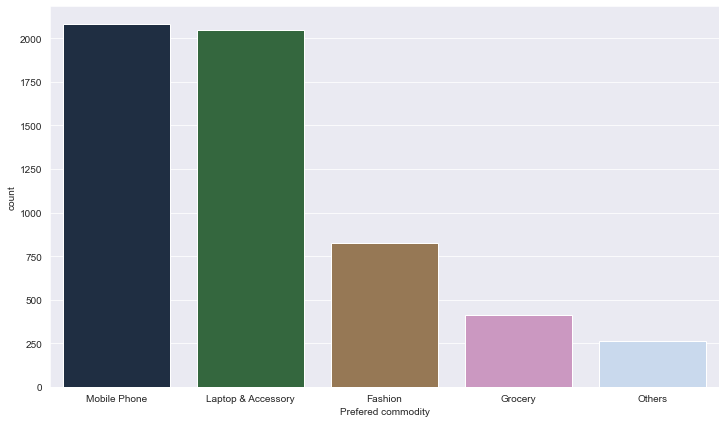

In [30]:
plt.figure(figsize = (12,7))
sns.countplot(x ='PreferedOrderCat', data = churn,
              palette = 'cubehelix',
              order = churn['PreferedOrderCat'].value_counts().index) 
plt.xlabel('Prefered commodity');

**Answer**: Consumer had purchaed mobile and laptop & its accessories maximum number of times

Q5.) What is the average cashback on per order?<a class= "anchor" id="7.6"></a>

In [31]:
print("Answer:The Average cashback on per order are:-  \n", churn['CashbackAmount'] /churn['OrderCount'])

Answer:The Average cashback on per order are:-  
 0       159.930
1       120.900
2       120.280
3       134.070
4       129.600
         ...   
5625     75.355
5626    112.455
5627     93.210
5628     89.450
5629     84.520
Length: 5630, dtype: float64


Q6.) Find out average customer churn rate ?<a class= "anchor" id="7.7"></a>

In [32]:
x= round((churn['Churn'][churn['Churn']==1].count()*100/churn['Churn'][churn['Churn']==0].count()),2)

In [33]:
print("Answer : The Average customer churn rate according to Dataset is \n","       " ,  x)

Answer : The Average customer churn rate according to Dataset is 
         20.25


In [34]:
 round((churn['Churn'][churn['Churn']==1].count()/churn['Churn'][churn['Churn']==0].count()),2)

0.2

Q7.) How many Average hours does customer visited on app?<a class= "anchor" id="7.8"></a>

In [35]:
print("Answer: Average hours spend by customer on Application = ",round(churn["HourSpendOnApp"].sum()/5630))

Answer: Average hours spend by customer on Application =  3


# Missing value Treatment<a class= "anchor" id="8"></a>

[Table of content](#0.1)

## Finding missing value in data<a class= "anchor" id="8.1"></a>

In [36]:
(churn.isnull().sum())*100/len(churn)

Churn                          0.000000
Tenure                         4.689165
PreferredLoginDevice           0.000000
CityTier                       0.000000
WarehouseToHome                4.458259
PreferredPaymentMode           0.000000
Gender                         0.000000
HourSpendOnApp                 4.529307
NumberOfDeviceRegistered       0.000000
PreferedOrderCat               0.000000
SatisfactionScore              0.000000
MaritalStatus                  0.000000
NumberOfAddress                0.000000
Complain                       0.000000
OrderAmountHikeFromlastYear    4.706927
CouponUsed                     4.547069
OrderCount                     4.582593
DaySinceLastOrder              5.452931
CashbackAmount                 0.000000
dtype: float64

* 7 variable have null value and all are them contain null value below 6%



Hence now we are going to treat them.  

## Treatment of missing value<a class= "anchor" id="8.2"></a>

[Table of content](#0.1)

In [37]:
for i in churn.columns:
    if churn[i].isnull().sum() > 0:
        churn[i].fillna(churn[i].median(),inplace=True)

In [38]:
churn.isnull().sum()

Churn                          0
Tenure                         0
PreferredLoginDevice           0
CityTier                       0
WarehouseToHome                0
PreferredPaymentMode           0
Gender                         0
HourSpendOnApp                 0
NumberOfDeviceRegistered       0
PreferedOrderCat               0
SatisfactionScore              0
MaritalStatus                  0
NumberOfAddress                0
Complain                       0
OrderAmountHikeFromlastYear    0
CouponUsed                     0
OrderCount                     0
DaySinceLastOrder              0
CashbackAmount                 0
dtype: int64

We had done missing value treatment successfully this treatment is plays very critical role in model development . we fill median value of a particular variable 

# Outlier Treatment<a class= "anchor" id="9"></a>

[Table of content](#0.1)

We will now treat outliers. For this we will define the lower range and upper range ,We will find outliers by percentile method. 

## Percentile Method<a class= "anchor" id="9.1"></a>

[Table of content](#0.1)

In [39]:
churn.describe(percentiles=[.01,.02,.03,.04,.05,.25,.5,.75,.90,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.0000,0.00,0.0000,0.0000,0.00,0.00,0.0000,1.00,1.0000,1.00,1.00,1.0000,1.0000,1.00
Tenure,5630.0,10.134103,8.357951,0.0,0.00,0.0000,0.00,0.0000,0.0000,3.00,9.00,15.0000,23.00,27.0000,28.00,29.00,30.0000,30.0000,61.00
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.0000,1.00,1.0000,1.0000,1.00,1.00,3.0000,3.00,3.0000,3.00,3.00,3.0000,3.0000,3.00
WarehouseToHome,5630.0,15.566785,8.345961,5.0,6.00,6.0000,6.00,6.0000,6.0000,9.00,14.00,20.0000,30.00,32.0000,33.00,34.00,35.0000,35.0000,127.00
HourSpendOnApp,5630.0,2.934636,0.705528,0.0,2.00,2.0000,2.00,2.0000,2.0000,2.00,3.00,3.0000,4.00,4.0000,4.00,4.00,4.0000,4.0000,5.00
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,1.00,1.0000,1.00,1.0000,2.0000,3.00,4.00,4.0000,5.00,5.0000,5.00,5.00,6.0000,6.0000,6.00
SatisfactionScore,5630.0,3.066785,1.380194,1.0,1.00,1.0000,1.00,1.0000,1.0000,2.00,3.00,4.0000,5.00,5.0000,5.00,5.00,5.0000,5.0000,5.00
NumberOfAddress,5630.0,4.214032,2.583586,1.0,1.00,1.0000,1.00,1.0000,1.0000,2.00,3.00,6.0000,8.00,10.0000,10.00,10.00,10.0000,11.0000,22.00
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.0000,0.00,0.0000,0.0000,0.00,0.00,1.0000,1.00,1.0000,1.00,1.00,1.0000,1.0000,1.00
OrderAmountHikeFromlastYear,5630.0,15.674600,3.591058,11.0,11.00,11.0000,11.00,11.0000,11.0000,13.00,15.00,18.0000,21.00,23.0000,23.00,24.00,24.0000,25.0000,26.00


**Graphical representation of data**

Text(0, 0.5, 'Values')

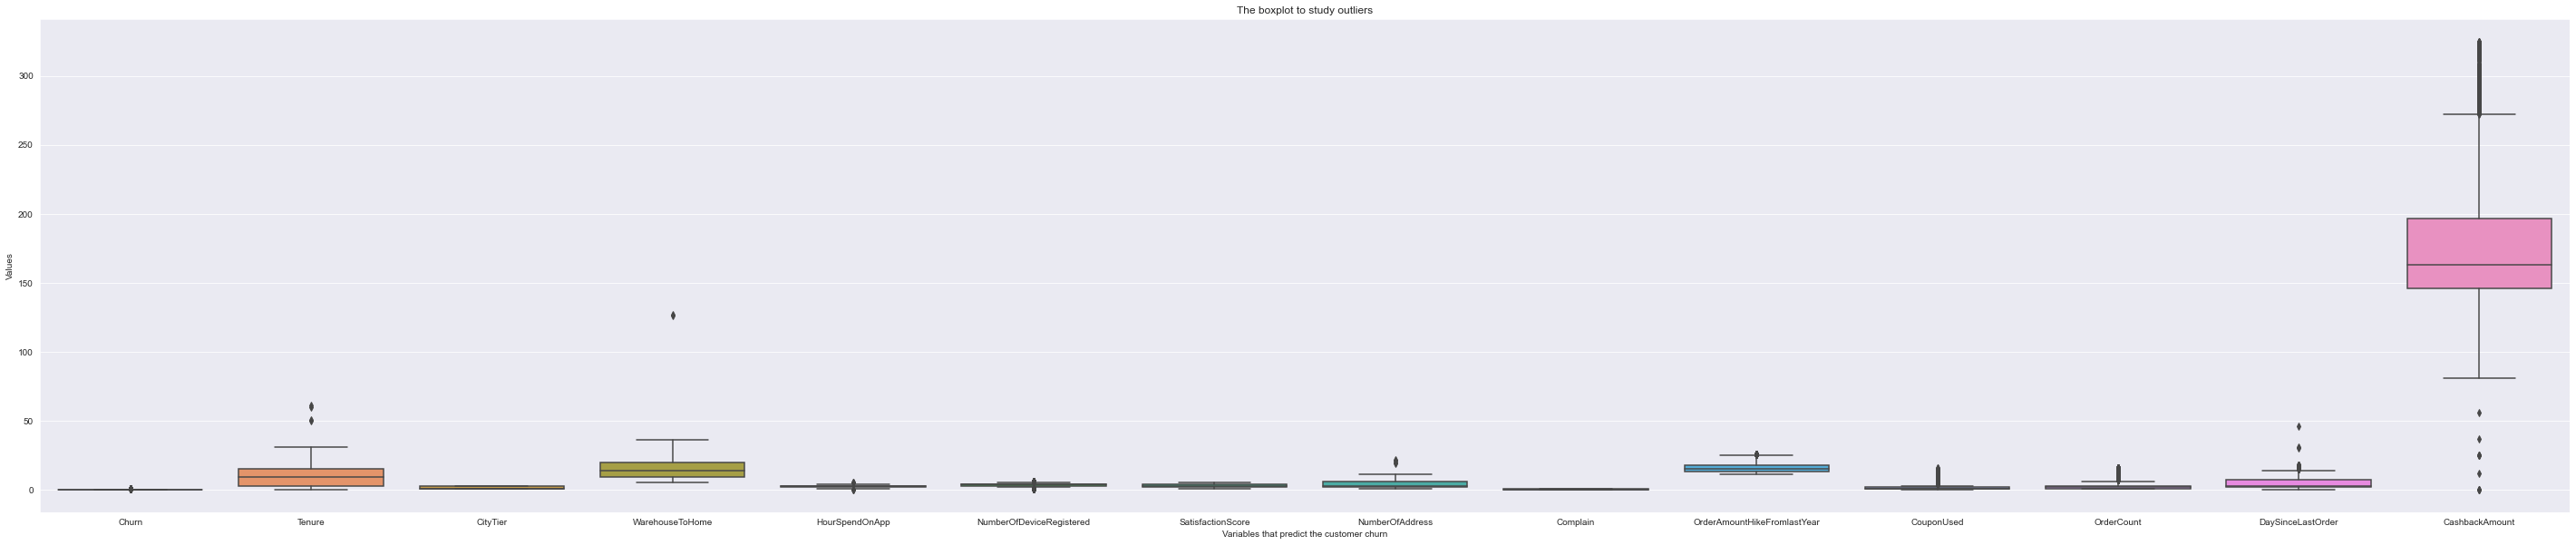

In [40]:
plt.figure(figsize=(50,10))
sns.boxplot(data=churn)
plt.title('The boxplot to study outliers')
plt.xlabel('Variables that predict the customer churn')
plt.ylabel('Values')

we have few outliers in or data so we will treat them by applying caping method.

## Capping of outliers<a class= "anchor" id="9.2"></a>


[Table of content](#0.1)

In [41]:
### Outlier Capping Function - Method -1
def outliers_percentile(x):
    x=x.clip(upper=x.quantile(.99))
#     x=x.clip(lower=x.quantile(.01))
    return x

In [42]:
df_out=churn[num_cols]
# df_out

In [43]:
df_not_out=churn[cat_cols]
# df_not_out 

In [44]:
df_out1=df_out.apply(outliers_percentile)

In [45]:
df_out1.describe(percentiles=[.01,.02,.03, .04,.05,.25,.5,.75, .9,.95,.96,.97,.98,.99]).T

,count,mean,std,min,1%,2%,3%,4%,5%,25%,50%,75%,90%,95%,96%,97%,98%,99%,max
Churn,5630.0,0.168384,0.374240,0.0,0.00,0.0000,0.00,0.0000,0.0000,0.00,0.00,0.0000,1.00,1.0000,1.00,1.00,1.0000,1.000000,1.0000
Tenure,5630.0,10.107282,8.264387,0.0,0.00,0.0000,0.00,0.0000,0.0000,3.00,9.00,15.0000,23.00,27.0000,28.00,29.00,30.0000,30.000000,30.0000
CityTier,5630.0,1.654707,0.915389,1.0,1.00,1.0000,1.00,1.0000,1.0000,1.00,1.00,3.0000,3.00,3.0000,3.00,3.00,3.0000,3.000000,3.0000
WarehouseToHome,5630.0,15.525222,8.065594,5.0,6.00,6.0000,6.00,6.0000,6.0000,9.00,14.00,20.0000,30.00,32.0000,33.00,34.00,35.0000,35.000000,35.0000
HourSpendOnApp,5630.0,2.934103,0.704344,0.0,2.00,2.0000,2.00,2.0000,2.0000,2.00,3.00,3.0000,4.00,4.0000,4.00,4.00,4.0000,4.000000,4.0000
NumberOfDeviceRegistered,5630.0,3.688988,1.023999,1.0,1.00,1.0000,1.00,1.0000,2.0000,3.00,4.00,4.0000,5.00,5.0000,5.00,5.00,6.0000,6.000000,6.0000
SatisfactionScore,5630.0,3.066785,1.380194,1.0,1.00,1.0000,1.00,1.0000,1.0000,2.00,3.00,4.0000,5.00,5.0000,5.00,5.00,5.0000,5.000000,5.0000
NumberOfAddress,5630.0,4.207282,2.553082,1.0,1.00,1.0000,1.00,1.0000,1.0000,2.00,3.00,6.0000,8.00,10.0000,10.00,10.00,10.0000,11.000000,11.0000
Complain,5630.0,0.284902,0.451408,0.0,0.00,0.0000,0.00,0.0000,0.0000,0.00,0.00,1.0000,1.00,1.0000,1.00,1.00,1.0000,1.000000,1.0000
OrderAmountHikeFromlastYear,5630.0,15.668739,3.574977,11.0,11.00,11.0000,11.00,11.0000,11.0000,13.00,15.00,18.0000,21.00,23.0000,23.00,24.00,24.0000,25.000000,25.0000


In [46]:
churn1=pd.concat([df_not_out, df_out1], axis=1) 

Here we can see that we had treated all the outliers. The outliers are now replaced with their corresponding upper range or lower range values also we had concatinate both the table which has numeric value and categorical value.

In [47]:
churn1.head(3)

,PreferredLoginDevice,PreferredPaymentMode,Gender,PreferedOrderCat,MaritalStatus,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,Mobile Phone,Debit Card,Female,Laptop & Accessory,Single,1,4.0,3,6.0,3.0,3,2,9.0,1,11.0,1.0,1.0,5.0,159.93
1,Mobile Phone,UPI,Male,Mobile Phone,Single,1,9.0,1,8.0,3.0,4,3,7.0,1,15.0,0.0,1.0,0.0,120.90
2,Mobile Phone,Debit Card,Male,Mobile Phone,Single,1,9.0,1,30.0,2.0,4,3,6.0,1,14.0,0.0,1.0,3.0,120.28


# Dummy creation<a class= "anchor" id="10"></a>

[Table of content](#0.1)

Encoding the categorical feature
Machine Learning algorithm only take the numeric value that is why categorical variable needed to convert into numeric variable.
For this purpose One hot Encoding technique will be used.

In [48]:
ch=pd.get_dummies(churn1, columns=['PreferredLoginDevice', 'PreferredPaymentMode', 'Gender', 'PreferedOrderCat', 'MaritalStatus'], drop_first=True)

In [49]:
ch.head(3)

,Churn,Tenure,CityTier,WarehouseToHome,HourSpendOnApp,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,...,PreferredPaymentMode_Debit Card,PreferredPaymentMode_E wallet,PreferredPaymentMode_UPI,Gender_Male,PreferedOrderCat_Grocery,PreferedOrderCat_Laptop & Accessory,PreferedOrderCat_Mobile Phone,PreferedOrderCat_Others,MaritalStatus_Married,MaritalStatus_Single
0,1,4.0,3,6.0,3.0,3,2,9.0,1,11.0,...,1,0,0,0,0,1,0,0,0,1
1,1,9.0,1,8.0,3.0,4,3,7.0,1,15.0,...,0,0,1,1,0,0,1,0,0,1
2,1,9.0,1,30.0,2.0,4,3,6.0,1,14.0,...,1,0,0,1,0,0,1,0,0,1


We converted all categorical columns into numeric one.

# Model Development<a class= "anchor" id="11"></a>

[Table of content](#0.1)

## Data splitig into x and y<a class= "anchor" id="11.1"></a>

In [50]:
from sklearn.model_selection import train_test_split

In [51]:
X = ch.drop('Churn', axis = 1)
y = ch['Churn']

X is our independent variables

Y is our Dependent Variable

Target variable is dependent variable.

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 21)

spliting data into training and testing of data

According to above code we are spliting data into 70:30 means: 70% were in train & 30% were in test section.




In [53]:
print(X_train.shape)
print(X_test.shape)

(3941, 25)
(1689, 25)


As data is  over-sampled , we needed to increase it make equal label, for this we use SMOTE for oversampling

In [54]:
print(y_train.value_counts(normalize = True).round(2))
print(' ')
print(y_test.value_counts(normalize = True).round(2))

0    0.83
1    0.17
Name: Churn, dtype: float64
 
0    0.83
1    0.17
Name: Churn, dtype: float64


83:17 the ratio of spliting data is imbalanced

## Data Balancing with Smote<a class= "anchor" id="11.2"></a>


[Table of content](#0.1)

In [55]:
from imblearn.over_sampling import SMOTE 
sm = SMOTE(random_state=2, sampling_strategy = 0.75)
X_res, y_res = sm.fit_resample(X_train, y_train)

In [56]:
print(X_res.shape)
print(y_res.shape)

(5733, 25)
(5733,)


Resampling data into x_res,y_res after Balancing it. 

## Logistic Regression<a class= "anchor" id="11.3"></a>

[Table of content](#0.1)

In [57]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

In [58]:
lr=LogisticRegression()

In [59]:
lr.fit(X_res,y_res)

C:\Users\HP\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



LogisticRegression()

In [60]:
y_pred=lr.predict(X_test)

## Accuracy<a class= "anchor" id="11.4"></a>


[Table of content](#0.1)

**confusion matrix**

In [61]:
from sklearn.metrics import confusion_matrix

Confusion Matrix


<AxesSubplot:>

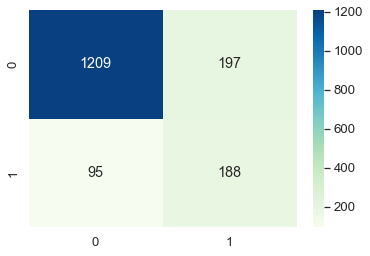

In [62]:
cm_test_dt=confusion_matrix(y_test,y_pred)
sns.set(font_scale = 1.2)
print('Confusion Matrix')
sns.heatmap(cm_test_dt, annot = True,fmt = 'd', cmap='GnBu')

## Summary<a class= "anchor" id="12"></a>

[Table of content](#0.1)



Based on the predictive models we created the Logistic Regression would be a better choice. We can also tune this model By implementing different techniques of the feature set for better prediction.

With the existing consumer insights through data, companies can predict customers’ possible needs and issues, define proper strategies and solutions against them, meet their expectations and retain their business. Based on the predictive analysis and modeling, businesses can focus their attention with targeted approach by segmenting and offering them customized solutions. Analyzing how and when the churn is happening in customer’s lifecycle with the services will allow the company to come up with more preemptive measures.